# Import software libraries

In [1]:
# Import required libraries.
import sys                          # Read system parameters.
import numpy as np                  # Work with multi-dimensional arrays.
import pandas as pd                 # Manipulate and analyze data.
import matplotlib                   # Create and format charts.
import matplotlib.pyplot as plt  
import seaborn as sns               # Make charting easier.

# Summarize software libraries used.
print('Libraries used in this project:')
print('- NumPy {}'.format(np.__version__))
print('- Python {}'.format(sys.version))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sns.__version__))

Libraries used in this project:
- NumPy 1.19.2
- Python 3.7.6 | packaged by conda-forge | (default, Mar 23 2020, 23:03:20) 
[GCC 7.3.0]
- pandas 1.1.3
- Matplotlib 3.3.2
- Seaborn 0.11.0


# Read and examine the data

In [2]:
# Read the data that was put through the ETL process in Course 2 of the CDSP Specialization. 

df = pd.read_pickle('data/online_history_cleaned.pickle')


# Preview the first five rows of the data.
df.head()


,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Description
0,536365,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER
1,536367,84879,32,2010-12-01 08:34:00,1.69,u13047,United Kingdom,54.08,ASSORTED COLOUR BIRD ORNAMENT
2,536373,85123A,6,2010-12-01 09:02:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER
3,536375,85123A,6,2010-12-01 09:32:00,2.55,u1785,United Kingdom,15.30,CREAM HANGING HEART T-LIGHT HOLDER
4,536378,20725,10,2010-12-01 09:37:00,1.65,u14688,United Kingdom,16.50,LUNCH BAG RED RETROSPOT


In [3]:
# Get the shape of the data.
df.shape


(15206, 9)

In [4]:
# Get the data types for every column in the DataFrame.
# df['Invoice'] = pd.to_datetime(df['Invoice'])
df['Invoice'] = pd.to_datetime(df['Invoice'], errors='coerce')
df.dtypes

Invoice        datetime64[ns]
StockCode              object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
CustomerID             object
Country                object
TotalAmount           float64
Description            object
dtype: object

# Generate summary statistics for all of the data

In [5]:
# Get a DataFrame of summary statistics that describe the data, including mean, median, standard deviation, etc.
# Be sure to include all variables, including categorical ones.
summary_stats = df.describe(include='all')
summary_stats



,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,Description
count,697,15206,15206.000000,15206,15194.000000,12435,15206,15194.000000,15206
unique,367,10,NaN,8022,NaN,2473,1,NaN,10
top,2058-12-17 00:00:00,85123A,NaN,2011-05-10 15:07:00,NaN,u17841,United Kingdom,NaN,CREAM HANGING HEART T-LIGHT HOLDER
freq,9,2163,NaN,10,NaN,171,15206,NaN,2163
first,2054-01-20 00:00:00,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN,NaN,NaN
last,2058-12-25 00:00:00,NaN,NaN,2011-12-09 12:31:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,16.775483,NaN,4.164267,NaN,NaN,40.705153,NaN
std,NaN,NaN,79.496270,NaN,4.377605,NaN,NaN,132.142503,NaN
min,NaN,NaN,1.000000,NaN,0.400000,NaN,NaN,0.550000,NaN
25%,NaN,NaN,2.000000,NaN,1.650000,NaN,NaN,8.850000,NaN


In [6]:
unique_values = {
    'Unique Customers': df['CustomerID'].nunique(),
    'Unique Invoices': df['Invoice'].nunique(),
    'Unique Stock Codes': df['StockCode'].nunique(),
    'Unique Countries': df['Country'].nunique()
}
unique_values

{'Unique Customers': 2473,
 'Unique Invoices': 367,
 'Unique Stock Codes': 10,
 'Unique Countries': 1}

# Plot a bar chart for the average price per item

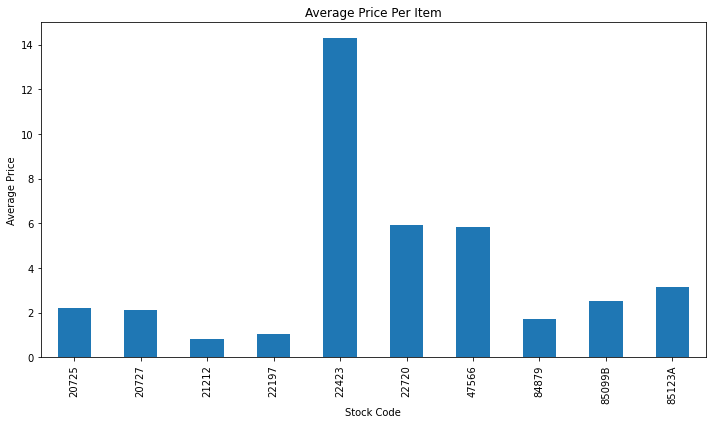

In [7]:
# Plot the average price per item using a bar chart.
# Make sure the average price is on one axis, and each distinct item description is on the other axis.

avg_price_per_item = df.groupby('StockCode')['Price'].mean()


plt.figure(figsize=(10, 6))
avg_price_per_item.plot(kind='bar')
plt.title('Average Price Per Item')
plt.xlabel('Stock Code')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  # Rotate the x-axis labels vertically
plt.tight_layout()
plt.show()






# Explore the distribution of the numeric variable `Price`

In [8]:
# Get a DataFrame of summary statistics for numeric variables only.
numeric_summary_stats = df.describe()
numeric_summary_stats

,Quantity,Price,TotalAmount
count,15206.000000,15194.000000,15194.000000
mean,16.775483,4.164267,40.705153
std,79.496270,4.377605,132.142503
min,1.000000,0.400000,0.550000
25%,2.000000,1.650000,8.850000
50%,6.000000,2.550000,16.500000
75%,12.000000,4.950000,30.360000
max,4300.000000,32.040000,4921.500000


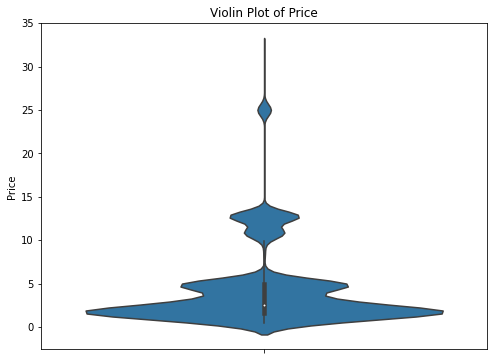

In [9]:
# Generate a violin plot for the "Price" variable.
# Decorate and style the plot however you think is best.

plt.figure(figsize=(8, 6))
sns.violinplot(y=df['Price'])
plt.title('Violin Plot of Price')
plt.ylabel('Price')
plt.show()

# Visualize correlations between numeric variables

In [10]:
# Generate a correlation matrix between all numeric variables.
correlation_matrix = df.corr()
correlation_matrix




,Quantity,Price,TotalAmount
Quantity,1.000000,-0.088356,0.745641
Price,-0.088356,1.000000,0.109054
TotalAmount,0.745641,0.109054,1.000000


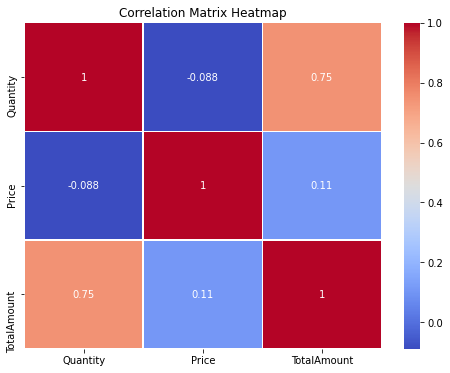

In [11]:
# Visualize the correlations with a heatmap.
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()




# Transform skewed variables

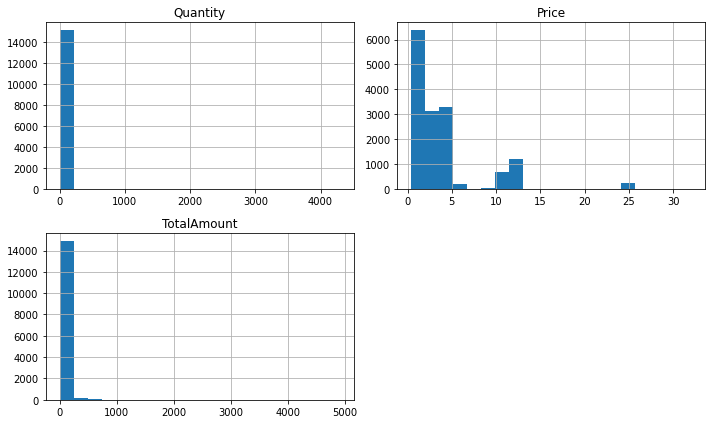

In [12]:
# Plot histograms for the original distributions of all numeric variables.
df[['Quantity', 'Price', 'TotalAmount']].hist(figsize=(10, 6), bins=20)
plt.tight_layout()
plt.show()


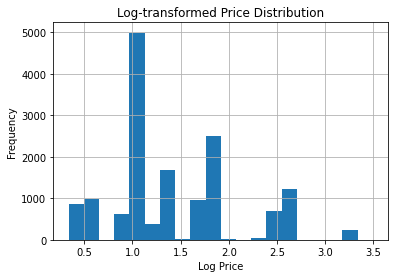

In [13]:
# Plot the log transformation of "Price".

df['LogPrice'] = df['Price'].apply(lambda x: np.log(x + 1))
df['LogPrice'].hist(figsize=(6, 4), bins=20)
plt.title('Log-transformed Price Distribution')
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.show()


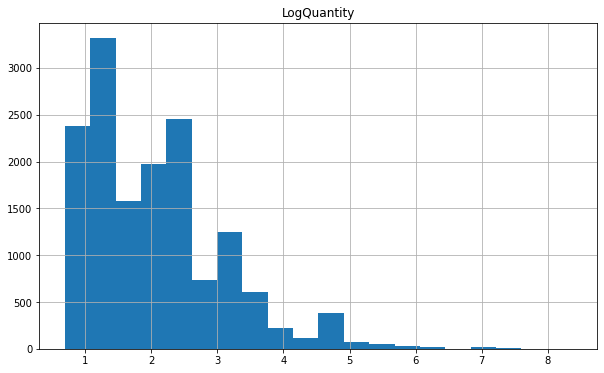

In [14]:
# Plot the log transformation of "Quantity".
df['LogQuantity'] = df['Quantity'].apply(lambda x: np.log(x + 1))
df[['LogQuantity']].hist(figsize=(10, 6), bins=20)
plt.show()



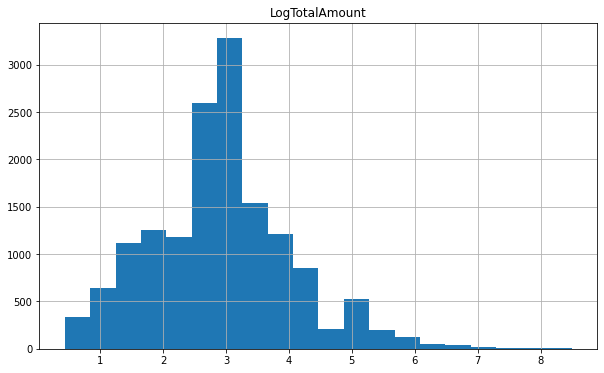

In [15]:
# Plot the log transformation of "TotalAmount".
df['LogTotalAmount'] = df['TotalAmount'].apply(lambda x: np.log(x + 1))
df[['LogTotalAmount']].hist(figsize=(10, 6), bins=20)
plt.show()



# Analyze time series data

In [16]:
# Obtain the number of invoices by month.

df['Invoice'] = pd.to_datetime(df['Invoice'])

# Extract year and month
df['MonthYear'] = df['Invoice'].dt.to_period('M')

# Print the number of invoices by month.
invoices_per_month = df.groupby('MonthYear')['Invoice'].nunique()
invoices_per_month


MonthYear
2054-01     2
2054-03     1
2054-04    11
2054-05    16
2054-06     1
2054-07     2
2054-08    10
2054-09     3
2054-10     8
2054-11     5
2054-12     9
2055-01     9
2055-02    10
2055-03    16
2055-04     1
2055-05    11
2055-06     9
2055-07     4
2055-08     8
2055-09     6
2055-10    14
2055-11     1
2056-01     8
2056-02     6
2056-04     5
2056-05     3
2056-06     2
2056-07    12
2056-08     2
2056-09     9
2056-10    12
2056-11     4
2056-12    14
2057-01    13
2057-02    10
2057-04     7
2057-05     4
2057-07     2
2057-08     3
2057-10     4
2057-11     6
2057-12    14
2058-01     8
2058-02     2
2058-03    10
2058-04     1
2058-05    11
2058-06     4
2058-07     6
2058-08     3
2058-09     4
2058-10    11
2058-11     4
2058-12     6
Freq: M, Name: Invoice, dtype: int64

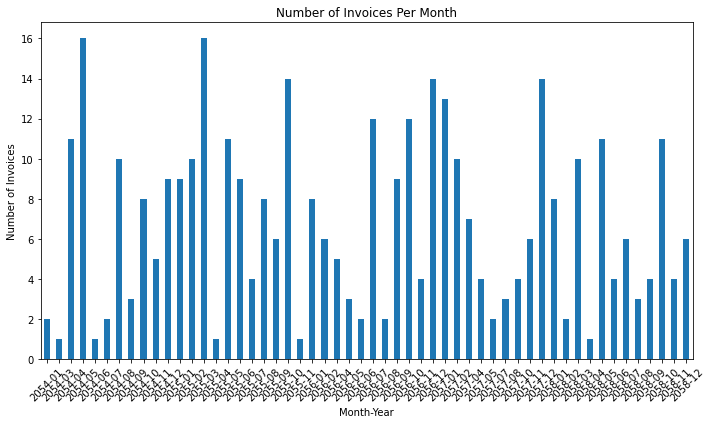

In [17]:
# Use a bar chart to plot the number of invoices by month.
plt.figure(figsize=(10, 6))
invoices_per_month.plot(kind='bar')
plt.title('Number of Invoices Per Month')
plt.xlabel('Month-Year')
plt.ylabel('Number of Invoices')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




# Identify and handle missing data

In [18]:
# Identify any missing data for all variables.

missing_values = df.isnull().sum()
missing_values

Invoice           14509
StockCode             0
Quantity              0
InvoiceDate           0
Price                12
CustomerID         2771
Country               0
TotalAmount          12
Description           0
LogPrice             12
LogQuantity           0
LogTotalAmount       12
MonthYear         14509
dtype: int64

In [19]:
# Print the current shape of the data.
print('Shape before:', df.shape)


# Remove rows of data where "CustomerID" is unknown.
df = df.dropna(subset=['CustomerID'])


# Print the new shape of the data.
print('Shape after:', df.shape)


Shape before: (15206, 13)
Shape after: (12435, 13)


In [20]:
# Fill in N/A values for "Price" and "TotalAmount" with 0.
df['Price'].fillna(0, inplace=True)
df['TotalAmount'].fillna(0, inplace=True)




# Confirm there are no longer any missing values.
missing_values_after = df.isnull().sum()
missing_values_after


Invoice           11884
StockCode             0
Quantity              0
InvoiceDate           0
Price                 0
CustomerID            0
Country               0
TotalAmount           0
Description           0
LogPrice              1
LogQuantity           0
LogTotalAmount        1
MonthYear         11884
dtype: int64

# One-hot encode the `Description` variable

In [21]:
# One-hot encode the "Description" variable with dummy variables for each unique description.
# Prefix each dummy variable name with "Description".

description_dummies = pd.get_dummies(df['Description'], prefix='Description')

# Preview the first five rows of the DataFrame.
description_dummies.head()


,Description_ASSORTED COLOUR BIRD ORNAMENT,Description_CREAM HANGING HEART T-LIGHT HOLDER,Description_JUMBO BAG RED RETROSPOT,Description_LUNCH BAG BLACK SKULL.,Description_LUNCH BAG RED RETROSPOT,Description_PACK OF 72 RETROSPOT CAKE CASES,Description_PARTY BUNTING,Description_POPCORN HOLDER,Description_REGENCY CAKESTAND 3 TIER,Description_SET OF 3 CAKE TINS PANTRY DESIGN
0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0


In [22]:
# Concatenate the new encoded columns with the main DataFrame.

df = pd.concat([df, description_dummies], axis=1)

# Drop the original "Description" variable.
df.drop('Description', axis=1, inplace=True)



In [23]:
# Preview the first five rows of the data.
df.head()


,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,LogPrice,LogQuantity,...,Description_ASSORTED COLOUR BIRD ORNAMENT,Description_CREAM HANGING HEART T-LIGHT HOLDER,Description_JUMBO BAG RED RETROSPOT,Description_LUNCH BAG BLACK SKULL.,Description_LUNCH BAG RED RETROSPOT,Description_PACK OF 72 RETROSPOT CAKE CASES,Description_PARTY BUNTING,Description_POPCORN HOLDER,Description_REGENCY CAKESTAND 3 TIER,Description_SET OF 3 CAKE TINS PANTRY DESIGN
0,NaT,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,15.30,1.266948,1.945910,...,0,1,0,0,0,0,0,0,0,0
1,NaT,84879,32,2010-12-01 08:34:00,1.69,u13047,United Kingdom,54.08,0.989541,3.496508,...,1,0,0,0,0,0,0,0,0,0
2,NaT,85123A,6,2010-12-01 09:02:00,2.55,u1785,United Kingdom,15.30,1.266948,1.945910,...,0,1,0,0,0,0,0,0,0,0
3,NaT,85123A,6,2010-12-01 09:32:00,2.55,u1785,United Kingdom,15.30,1.266948,1.945910,...,0,1,0,0,0,0,0,0,0,0
4,NaT,20725,10,2010-12-01 09:37:00,1.65,u14688,United Kingdom,16.50,0.974560,2.397895,...,0,0,0,0,1,0,0,0,0,0


# Identify and remove columns with low variance

In [24]:
# Obtain the standard deviation of each variable.
std_devs = df.std()
std_devs


Quantity                                           77.436253
Price                                               3.506381
TotalAmount                                       132.092738
LogPrice                                            0.600163
LogQuantity                                         1.059758
LogTotalAmount                                      1.096991
Description_ASSORTED COLOUR BIRD ORNAMENT           0.308044
Description_CREAM HANGING HEART T-LIGHT HOLDER      0.362575
Description_JUMBO BAG RED RETROSPOT                 0.322017
Description_LUNCH BAG  BLACK SKULL.                 0.274661
Description_LUNCH BAG RED RETROSPOT                 0.288011
Description_PACK OF 72 RETROSPOT CAKE CASES         0.254417
Description_PARTY BUNTING                           0.306081
Description_POPCORN HOLDER                          0.267557
Description_REGENCY CAKESTAND 3 TIER                0.317766
Description_SET OF 3 CAKE TINS PANTRY DESIGN        0.273557
dtype: float64

In [25]:
# Define a standard deviation threshold of 0.26.

threshold = 0.26

# Identify any columns that are lower than the threshold.
low_variance_columns = std_devs[std_devs < threshold].index


# Print the column(s) that will be dropped.
low_variance_columns


Index(['Description_PACK OF 72 RETROSPOT CAKE CASES'], dtype='object')

In [26]:
# Drop the column(s) that have low standard deviation from the main dataset.

df.drop(columns=low_variance_columns, inplace=True)


# Preview the first five rows of data.
df.head()


,Invoice,StockCode,Quantity,InvoiceDate,Price,CustomerID,Country,TotalAmount,LogPrice,LogQuantity,...,MonthYear,Description_ASSORTED COLOUR BIRD ORNAMENT,Description_CREAM HANGING HEART T-LIGHT HOLDER,Description_JUMBO BAG RED RETROSPOT,Description_LUNCH BAG BLACK SKULL.,Description_LUNCH BAG RED RETROSPOT,Description_PARTY BUNTING,Description_POPCORN HOLDER,Description_REGENCY CAKESTAND 3 TIER,Description_SET OF 3 CAKE TINS PANTRY DESIGN
0,NaT,85123A,6,2010-12-01 08:26:00,2.55,u1785,United Kingdom,15.30,1.266948,1.945910,...,NaT,0,1,0,0,0,0,0,0,0
1,NaT,84879,32,2010-12-01 08:34:00,1.69,u13047,United Kingdom,54.08,0.989541,3.496508,...,NaT,1,0,0,0,0,0,0,0,0
2,NaT,85123A,6,2010-12-01 09:02:00,2.55,u1785,United Kingdom,15.30,1.266948,1.945910,...,NaT,0,1,0,0,0,0,0,0,0
3,NaT,85123A,6,2010-12-01 09:32:00,2.55,u1785,United Kingdom,15.30,1.266948,1.945910,...,NaT,0,1,0,0,0,0,0,0,0
4,NaT,20725,10,2010-12-01 09:37:00,1.65,u14688,United Kingdom,16.50,0.974560,2.397895,...,NaT,0,0,0,0,1,0,0,0,0


# Generate box plots for each numeric variable

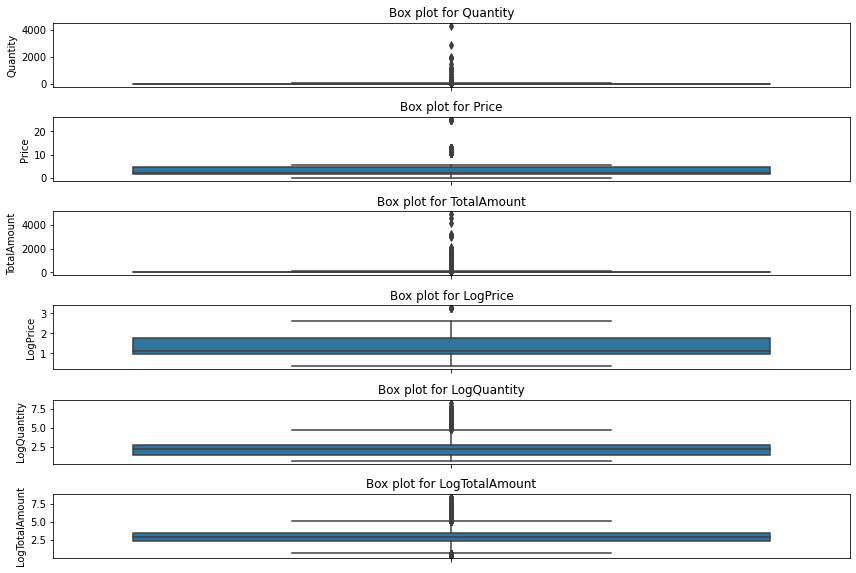

In [27]:
# Draw box plots for each numeric variable.
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 8))
for i, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns), 1, i + 1)
    sns.boxplot(y=df[column])
    plt.title(f'Box plot for {column}')

plt.tight_layout()
plt.show()










# Identify and remove outliers

In [28]:
# This function returns the lower and upper bounds of a numeric input variable.

def calc_outliers(var):
    q3 = np.percentile(var, 75) 
    q1 = np.percentile(var, 25)

    iqr = 1.5 * (q3 - q1)

    lb = q1 - iqr
    ub = q3 + iqr

    print('Lower bound of outliers:', round(lb, 2), '\nUpper bound of outliers:', round(ub, 2))
    
    return lb, ub

In [29]:
# Identify the shape of the data before removing outliers.

print("Shape before removing outliers:", df.shape)


Shape before removing outliers: (12435, 21)


In [30]:
# Call the calc_outliers() function iteratively for each numeric variable.
# For each variable:
#     Remove the outliers that are higher than the upper bounds.
#     Remove the variables that are lower than the lower bounds.
# As you iterate through each variable, print the shape of the data after the outliers for that variable are removed.



# Call the calc_outliers() function iteratively for each numeric variable.
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    # Check if the column has valid data
    if df[column].notnull().any():  # Check if there are any non-null values
        # Get the lower and upper bounds for outliers
        lower_bound, upper_bound = calc_outliers(df[column])
        
        # Print the shape of the dataset before removing outliers
        print(f"Shape before removing outliers from {column}: {df.shape}")
        
        # Remove outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
        
        # Print the shape of the dataset after removing outliers
        print(f"Shape after removing outliers from {column}: {df.shape}")
    else:
        print(f"No valid data in {column}, skipping outlier removal.")





Lower bound of outliers: -15.0 
Upper bound of outliers: 33.0
Shape before removing outliers from Quantity: (12435, 21)
Shape after removing outliers from Quantity: (11480, 21)
Lower bound of outliers: -3.3 
Upper bound of outliers: 9.9
Shape before removing outliers from Price: (11480, 21)
Shape after removing outliers from Price: (10086, 21)
Lower bound of outliers: -11.7 
Upper bound of outliers: 40.3
Shape before removing outliers from TotalAmount: (10086, 21)
Shape after removing outliers from TotalAmount: (9133, 21)
Lower bound of outliers: nan 
Upper bound of outliers: nan
Shape before removing outliers from LogPrice: (9133, 21)
Shape after removing outliers from LogPrice: (0, 21)
No valid data in LogQuantity, skipping outlier removal.
No valid data in LogTotalAmount, skipping outlier removal.


# Save the final dataset as a pickle file

In [31]:
# Save the final dataset as a pickle file named online_history_cleaned_final.pickle.
df.to_pickle('final_dataset.pickle')
